# Classifying Tweet Emotions

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import re

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

# Import NLP modules
import spacy
import fasttext

# from textblob import TextBlob
# from langdetect import detect

pd.set_option('display.max_colwidth', 160)

## Data Preparation

In [3]:
# Read data
df = pd.read_csv('data/text_emotion.csv', usecols=list(range(1,4)))

In [4]:
# Print the head of the data
df.head()

,sentiment,author,content
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [4]:
# Print the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: object(3)
memory usage: 937.6+ KB


In [5]:
# Describe the data
df.describe()

,sentiment,author,content
count,40000,40000,40000
unique,13,33871,39827
top,neutral,MissxMarisa,I just received a mothers day card from my lovely daughter wishing my a happy mothers day http://tr.im/kWK9
freq,8638,23,14


#### Exploring Data

##### Sentiment

In [6]:
# Print the count and the ratio of the emotions
pd.DataFrame([df.sentiment.value_counts(), df.sentiment.value_counts(normalize=True)]).T

,sentiment,sentiment
neutral,8638.0,0.215950
worry,8459.0,0.211475
happiness,5209.0,0.130225
sadness,5165.0,0.129125
love,3842.0,0.096050
surprise,2187.0,0.054675
fun,1776.0,0.044400
relief,1526.0,0.038150
hate,1323.0,0.033075
empty,827.0,0.020675


Text(0.5, 1.0, 'Emotions Normalized')

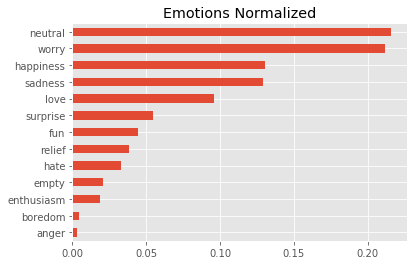

In [7]:
# Use ggplot style
plt.style.use('ggplot')

# Plot the value counts of emotions
df.sentiment.value_counts(normalize=True).sort_values(ascending=True).plot.barh()
plt.title('Emotions Normalized')

**Empty**: There is an emotion named "empty" in the data. I'd like to understand what it really means.

In [8]:
# Print head of the tweets with sentiment "empty"
df[df.sentiment == 'empty'].head()

,sentiment,author,content
0,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
44,empty,Aggie9,@creyes middle school and elem. High schools will remain open for those who need credits to graduate. Cali is broken
52,empty,Dreness023,@djmicdamn hey yu lil fucker i textd yu
141,empty,Gen22,@softtouchme just answered you- never learned how to write in French- just basic stuff-
180,empty,_SNO_,Have a headache I'm going to bed. Goodnight!


In [9]:
# Investigate empty
df[df.sentiment == 'empty'].sample(10)

,sentiment,author,content
7161,empty,WolfieFox,"@radinov BAH, you'be made me all hungry now"
8636,empty,andrezzapersou,Cold day :/ Studing all day long to the tests tomorrow
17504,empty,trevorosterholm,@robert_avalos lucky ass bitch I am stuck at work
12848,empty,KaKuBby,at panera for lunch byyy myself aww
7509,empty,learnedhoof,@jen4buz How inconsiderate!
4221,empty,ali_wright,"Glorious day in Glasgow for a change, and I'm working Too much to do to even contemplate knocking off early..."
22058,empty,mbleeker,"cower failure: when you mean to comply, but stand up for yourself instead"
23183,empty,P0150N0U5F15H,@Remy_Foster I did about 6 once
13578,empty,darcyyoung,reaaaallly bored
38753,empty,mike_met,Hoping my mom likes her pamper gifts I sent her


In [10]:
# Number of observations with "empty" sentiment
df[df.sentiment == 'empty'].shape[0]

827

I's clear from the contents that "empty" is not the same as "neutral". There are various types of emotions among tweets labeled as "empty". Although the number of such tweets is not significant, the rows labeled `empty` can be dropped from the dataset.

In [5]:
# Drop rows  with sentiment "empty"
df = df[df.sentiment != 'empty']

## UPDATE DATA PREPROCESSING

##### Author

In [9]:
# Print value counts
df.author.value_counts()

MissxMarisa        23
ChineseLearn       22
erkagarcia         19
MiDesfileNegro     19
lost_dog           18
tsarnick           17
KimmiMcfly         15
linnetwoods        15
Dogbook            14
twebbstack         14
cece_newnew        14
mrs_mcsupergirl    14
Quimo              14
divxdownloads      13
jesssicababesss    13
TraceyHewins       12
lesley007          12
lopezwilfred       12
Tittch             11
ComedyQueen        11
beingnobody        11
MandyPandy32       11
HanaStephenson     10
Samm_xo            10
sweetdreamer       10
violetbakes        10
Gemmaboyle         10
DawnofOURnight     10
keza34             10
BrandySanDiego     10
                   ..
magicboop           1
JustinJesselli      1
kimislolling        1
renatolz            1
mjrsuperstar        1
hairymaclary        1
Zombie_Plan         1
team140             1
SicknastyKaryn      1
Jeffdc5             1
sallismoney         1
allisonwannng       1
JESSABRAHAMS        1
slimcode            1
barnicles1

In [10]:
# Print the tweets of the author with highest number of tweets
df[df.author=='MissxMarisa']

,sentiment,author,content
260,surprise,MissxMarisa,"@freshypanda Im sorry I don't think I stick out, at least compared to what I used to look like."
333,hate,MissxMarisa,"@meganmansyn Hahahaha! It's not horrible, if others were singing with I'm sure it could work. I wish I could afford my own drum set"
1941,neutral,MissxMarisa,@tsarnick This year
2143,worry,MissxMarisa,@Zobi09 I'm concerned for that family
2298,neutral,MissxMarisa,"@tsarnick Yeah, that was my thumb last night. Sorry"
21267,love,MissxMarisa,"@shortyyyy Thank you I liked Joe's clothes' being ripped off and then Kevin screaming, &quot;Who are you!?!&quot; XD"
21560,surprise,MissxMarisa,"@Zanna85 Bill can take me to Fangtasia and hit this shot anytime! &quot;Roads, where we're going we don't need roads.&quot; LOVE that part!"
22574,happiness,MissxMarisa,@Zobi09 The cast of True Blood was there
22773,sadness,MissxMarisa,"@Zobi09 Haha yes I do it's hard work, too! I didn't get home until 3:00 AM, not like I sleep haha."
23154,neutral,MissxMarisa,@TheLonely California


##### Content

In [46]:
# Print the tweets of the authors who has multiple tweets in the dataset
df.content.value_counts()[df.content.value_counts()>1]

I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9                     14
FREE UNLIMITED RINGTONES!!! - http://tinyurl.com/freeringring - USA ONLY - Awesome 4 iphone                                      13
Happy Mothers Day                                                                                                                10
Happy Mother's Day!                                                                                                              10
happy mother's day                                                                                                                8
                                                                                                                                 ..
@andyclemmensen have you seen the game on the website?! awesomness!!! go on msn                                                   2
@thecompletes seen u a couple of times. Liked it                            

Some tweets are tweeted multiple times by different users. These may also be Retweets. There is no information about RTs in the dataset.

In [50]:
# Tweets with same content
df[df.content=='I just received a mothers day card from my lovely daughter wishing my a happy mothers day  http://tr.im/kWK9']

,tweet_id,sentiment,author,content
33496,1752619550,love,unifiedclock,I just received a mothers day card from my lov...
33693,1752674435,love,TheOrakill,I just received a mothers day card from my lov...
33874,1752725133,worry,charlesstinger,I just received a mothers day card from my lov...
34071,1752774341,love,jamesbankso,I just received a mothers day card from my lov...
34298,1752824798,love,sarahmarche,I just received a mothers day card from my lov...
34480,1752873814,love,xmanoxx,I just received a mothers day card from my lov...
34672,1752920582,love,oblongshmoblong,I just received a mothers day card from my lov...
34861,1752965288,love,lilpiggynose,I just received a mothers day card from my lov...
35051,1753009856,love,unitedstatesfre,I just received a mothers day card from my lov...
35232,1753052362,love,unifiedclock,I just received a mothers day card from my lov...


Interestingly, for the **same** tweet there are different sentiments in the target column. There may be other false labels in the dataset!

In [15]:
# Number of duplicated tweets (count only the first duplicate, not the total number!)
df.content.duplicated().sum()

167

In [16]:
# Total number of duplicated tweets
df.content.duplicated(keep=False).sum()

254

In [43]:
# Show sentiments of duplicated tweets
pd.DataFrame(df[df.content.duplicated()].groupby('content').sentiment.unique()).head()

,sentiment
content,
#frenchieb-day #frenchieb-day #frenchieb-day #frenchieb-day #frenchieb-day #frenchieb-day #frenchieb-day #frenchieb-day #frenchieb-day,[neutral]
0,[neutral]
"@DawnRichard Dawwwwwwwwwwwwn, I hit u back and told u y..........so please Read it, and pray before u decide",[neutral]
"@DougieMcfly Haha dude, we have the same b-date :p I'll wish u ur b-day the 3oth November. I'll also turn 16 Can u reply to me please ?","[worry, happiness]"
@JonathanRKnight BTW I STILL can't believe how Awesome the NEWJABBAKIDZ performance was...U in the masks..I screamed at my pc,[happiness]


In [54]:
# df[df.content.duplicated(keep=False)].sentiment = df[df.content.duplicated(keep=False)].groupby('content').sentiment.transform(lambda x: x.mode()[0])

#### Polarity

In [26]:
df.polarity.value_counts()

positive    15299
negative    15236
neutral      8638
Name: polarity, dtype: int64

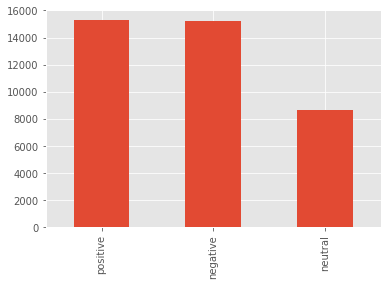

In [28]:
df.polarity.value_counts().plot.bar()

The frequencies of _sentiments_ appear to be more balanced when compared to that of the _emotions_.

In [16]:
# Create a sentiment dictionary to map EMOTIONS to POLARITY.
sentiment_dict = {'boredom': 'negative',
                  'hate': 'negative',
                  'sadness': 'negative',
                  'anger': 'negative',
                  'worry': 'negative',
                  'relief': 'positive',
                  #'empty': 'neutral',
                  'happiness': 'positive',
                  'love': 'positive',
                  'enthusiasm': 'positive',
                  'neutral': 'neutral',
                  'surprise':'positive',
                  'fun': 'positive'
                 }
df['polarity'] = df.sentiment.map(sentiment_dict)

#### UPDATE FEATURE ENGINEERING

In [17]:
# Mentions by sentiment_new
df.groupby('polarity').content.apply(lambda x: x.str.contains("@\w+").mean()).sort_values()

polarity
negative    0.415070
positive    0.502124
neutral     0.526578
Name: content, dtype: float64

#### Mentions

In [13]:
# Average # of tweets that contain "mentions"
df.content.str.contains("@\w+").mean()

0.473925

Almost half of the tweets contain mentions. This does not seem normal. Let's see the distribution of emotions through mentioned tweets.

In [25]:
# Distribution of @mentions among emotions
df.groupby('sentiment').content.apply(lambda x: x.str.contains("@\w+").mean()).sort_values()

sentiment
boredom       0.273743
hate          0.375661
sadness       0.400000
anger         0.427273
worry         0.433266
relief        0.441678
empty         0.488513
happiness     0.491265
love          0.504425
enthusiasm    0.508564
neutral       0.526395
surprise      0.527663
fun           0.546734
Name: content, dtype: float64

It seems that people tend to mention more when they have a positive sentiment such as fun, whearas they tend to mention less when they express boredom or hate. Let's investigate this result further.

In [18]:
def count_mentions(text):
    '''Returns number of mentions in a string.'''
    
    # Split the string into words
    words = text.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith("@")]
    
    # Return number of mentions
    return(len(mentions))

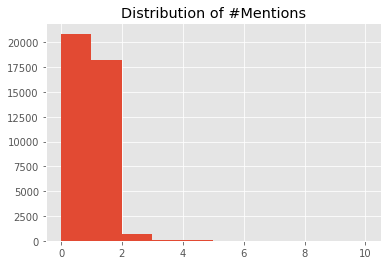

In [19]:
# Create a feature mention_count
df['mention_count'] = df['content'].apply(count_mentions)

# Plot the distribution
df['mention_count'].hist()
plt.title('Distribution of #Mentions')
plt.show()

In [61]:
df.groupby('sentiment').mention_count.mean().sort_values()

sentiment
boredom       0.290503
hate          0.397581
sadness       0.429235
anger         0.454545
worry         0.460456
relief        0.467890
happiness     0.522365
love          0.536960
enthusiasm    0.540184
surprise      0.561043
neutral       0.565026
fun           0.593468
Name: mention_count, dtype: float64

#### Hashtags

In [20]:
# Tweets that contain "hashtags"
df.content.str.contains("#\w+").mean()

0.019751975197519752

Only a small portion of tweets contain `#` (hashtag) s

In [21]:
def count_hashtags(text):
    '''Returns number of hashtags in a text.'''
    
    # Split the string into words
    words = text.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith("#")]
    
    # Return number of hashtags
    return(len(hashtags))

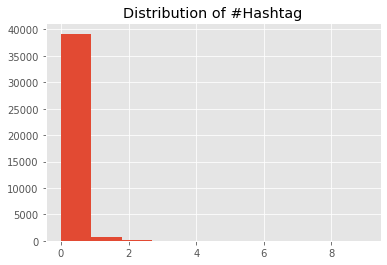

In [22]:
# Create a feature hashtag_count
df['hashtag_count'] = df['content'].apply(count_hashtags)

# Plot the distribution
df['hashtag_count'].hist()
plt.title('Distribution of #Hashtag')
plt.show()

#### Number of Characters

In [23]:
# Describe the length of the tweets in the contents column.
df.content.str.len().describe()

count    39996.000000
mean        73.412791
std         36.552671
min          6.000000
25%         43.000000
50%         69.000000
75%        103.000000
max        167.000000
Name: content, dtype: float64

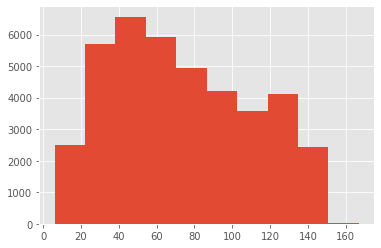

In [24]:
# Plot a histogram of the number of characters in tweets
df.content.str.len().hist()

Twitter has recently change the _character limit_ from 140 to 280. The dataset is possibly created before the change. However, some tweets contain more than 140 characters. I initially suspected that these are the ones with links. Yet the reason seems to be [Special Entities](http://www.htmlhelp.com/reference/html40/entities/special.html) such as `&quot;` or "`&amp;` which are rendered as -&quot;- and -&amp;- respectively. 

It is worth noting that most of the tweets contans less than 80 characters. It may be extremely hard to detect sentiments from such a text.

In [58]:
# Create a feature char_count
df['char_count'] = df['content'].apply(len)

In [59]:
df[df.char_count>140].sample(10)

,sentiment,author,content,polarity,mention_count,hashtag_count,char_count
25134,relief,Chrissy200,"@RobPattinson_ I hope filming is going well I'm new to the whole &quot;Twilight phenomenon&quot;, they couldn't have picked a better &quot;vampire&quot;!",positive,1,0,154
3969,happiness,AndreaDG,"@i_dulay i swear it took me 2 hours to get from bel air to alabang. but yes, i LOVED reminiscing about our HK trip with you &amp; @cdeocampo",positive,2,0,141
2257,fun,mick_the_real1,there are # days of summervac &amp; school comes along just 2 end it &amp; the annual problem of r generation is finding a good way 2 spend it!!,positive,0,1,144
6921,sadness,GlamGlitterati,"when i cheered,i yelled SHAKE THESE at the end of a chant and did the suck it &quot;X&quot; and got suspended &amp; had to give a public apology,lol",negative,0,0,148
39942,surprise,marisa_mm,@Rove1974 anychance you can get matthew to give a shout out to my mum Sarah for mothers day! we saw &quot;Ghosts from girlfriends past today&quot;,positive,1,0,146
27527,fun,TrudyFOD,@peacesignpamFOD that David -- nice to know he feels so comfortable &quot;twitting&quot; or &quot;tweeting&quot; us. I have a feeling he misses home.,positive,1,0,151
35591,happiness,ShelleyDelayne,@flygirls &quot;Mom set the bar so high I need to learn to fly to reach it!&quot; -- now THAT's an awesome sentiment to read on Mother's Day.,positive,1,0,141
27149,love,jeffparks,"Bumper Sticker: &quot;If you don't want to stand up for our troops, feel free to stand in front of them&quot; Thank you to all in the military",positive,0,0,142
32822,happiness,Gypsy_Ria,"Birthday was awesome!On video:my daughter opening last gift screaming in joy, &quot;My Birthday Wish Came True !!&quot;couldn't have been better.",positive,0,0,146
14875,sadness,Amy_Reindeer,@kimitwi btw i have your report too &gt;:] omg at lunch today we had to move from the HC to the trees cause of the heat &quot;/ all my days suck,negative,1,0,144


In [60]:
# Print tweets with less than 5 characters
df[df.char_count<5]

,sentiment,author,content,polarity,mention_count,hashtag_count,char_count


There are tweets which contains only a single character. These should be removed. 

In [26]:
# Drop rows with only one character
df.drop(df[df.content.str.len()<5].index, inplace=True)

#### UPDATE FEATURE ENGINEERING

In [27]:
df.shape

(39996, 6)

In [28]:
# Print tweets with less than 10 characters
df[df.content.str.len()<10].sample(5)

,sentiment,author,content,polarity,mention_count,hashtag_count
15232,sadness,quesogrande777,@bfly13,negative,1,0
35721,relief,imdinnar,success!,positive,0,0
18446,sadness,pooh2hawt,head hurt,negative,0,0
34404,neutral,Milliah16,Eating.,neutral,0,0
12968,neutral,McalpineBud,back home,neutral,0,0


Some tweets consist of only mentions. We may need to drop them as well, or we can just  change their sentiment to `neutral` (sentiment of some such tweets are not neutral!).

In [30]:
# Detect the tweets that contains only mentions
df[df.content.str.replace("@\w+", "").str.len()<2].head()

,sentiment,author,content,polarity,mention_count,hashtag_count
659,neutral,mallycakes,@Joshuah_Pearson,neutral,1,0
664,neutral,joelmagic,@emlevins,neutral,1,0
3181,neutral,Samantha_Mayy,@Clumsyflic,neutral,1,0
4865,neutral,edduleroy,@philleasfogg,neutral,1,0
4933,neutral,rickoshea,@WillKnott,neutral,1,0


In [47]:
# Print tweets with only mentions (and + 0, or 1 characters)
df[df.content.str.replace("@[\w|\d|_]+", "").str.len()<2].sample(10)

,sentiment,author,content,polarity,mention_count,hashtag_count
25527,neutral,fmeichel,@t_de_baillon,neutral,1,0
16808,neutral,mcrfash1,@chinaablue,neutral,1,0
6451,neutral,mcraddictal,@MCRmuffin,neutral,1,0
11289,sadness,ASinisterDuck,@lowestformofwit,negative,1,0
12275,neutral,CallMe_Goddess,@clarityxx,neutral,1,0
20665,neutral,VIVA_LA_SUE_SUE,@DJWiLLGATES,neutral,1,0
11145,neutral,YoungFlame,@yeshenia,neutral,1,0
25410,sadness,rubenerd,@oliyoung,negative,1,0
33729,empty,MercyStreetTeam,@iamjonathancook,NaN,1,0
18153,neutral,Derbygirl3,@Mashon96,neutral,1,0


In [48]:
# Number of tweets with only mentions bu no other text
df[df.content.str.replace("@[\w|\d|_]+", "").str.len()<2].shape[0]

76

In [89]:
# Number of tweets with only mentions bu no other text
df[df.content.str.replace("@[^\s]+", "").str.len()<2].shape[0]

77

In [66]:
# Change sentiment of the tweets with only mentions to "neutral"
df.loc[df.content.str.replace("@[^\s]+", "").str.len()<3, 'sentiment'] = "neutral"

In [45]:
# # Drop the tweets that contains only mentions
# df.drop(df[df.content.str.replace("@\w+", "").str.len()<2].index, inplace=True)

#### UPDATE FEATURE ENGINEERING

According to the news, average character count of a tweet is 33-34 characters. However, the average value of this dataset is around 74, which is significantly higher than the average. Number of characters might prove an important feature.

> The most common length of a tweet back when Twitter only allowed 140 characters was 34 characters. Now that the limit is 280 characters, the most common length of a tweet is 33 characters. Historically, only 9% of tweets hit Twitter’s 140-character limit, now it’s 1%. [source](https://techcrunch.com/2018/10/30/twitters-doubling-of-character-count-from-140-to-280-had-little-impact-on-length-of-tweets/)

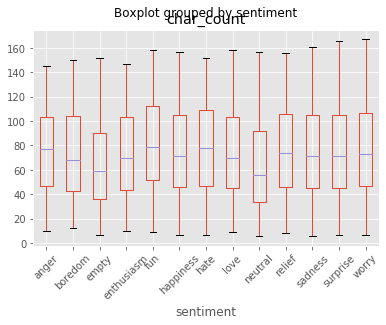

In [63]:
# Plot boxplot of char_count by sentiment
df.boxplot(column='char_count', by='sentiment', rot=45)

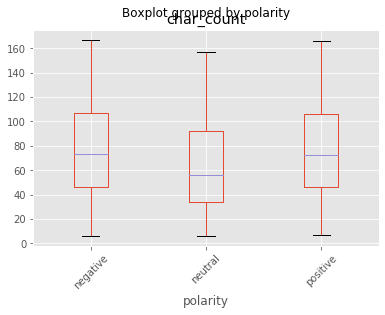

In [64]:
# Plot boxplot of char_count by polarity
df.boxplot(column='char_count', by='polarity', rot=45)

There seems to be some relationship between character count and the target. We may keep it as a feature.

#### Number of Words

In [90]:
def count_words(string):
    '''Returns number of words in a string'''
    
    # Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

In [91]:
# Create a new feature word_count
df['word_count'] = df.content.apply(count_words)

# Print the average word count of the talks
print(df['word_count'].mean())

13.218096809680969


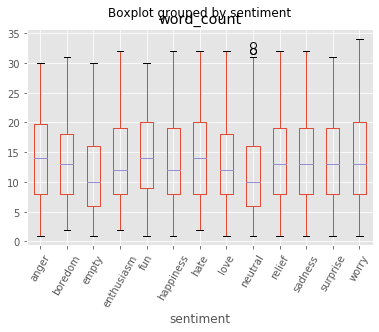

In [93]:
df.boxplot("word_count", by='sentiment', rot=60)

In [94]:
df[['word_count', 'char_count']].corr()

,word_count,char_count
word_count,1.000000,0.955981
char_count,0.955981,1.000000


There is a high correlation between character count and word count. I'll use character count in the analysis.

#### Hyperlinks

In [40]:
# Number/ratio of tweets with hyperlinks
df.content.str.lower().str.contains("http").agg([np.sum, np.mean])

sum     1811.00000
mean       0.04528
Name: content, dtype: float64

In [39]:
df[df.content.str.lower().str.contains("http")].sentiment.value_counts(normalize=True)

neutral       0.298730
worry         0.144119
happiness     0.141911
love          0.122032
sadness       0.079514
fun           0.059083
surprise      0.055218
relief        0.028713
empty         0.027057
hate          0.020983
enthusiasm    0.019326
anger         0.002209
boredom       0.001104
Name: sentiment, dtype: float64

In [108]:
df[~df.content.str.contains("http")].sentiment.value_counts(normalize=True)

worry         0.214692
neutral       0.211968
sadness       0.131491
happiness     0.129684
love          0.094828
surprise      0.054655
fun           0.043708
relief        0.038602
hate          0.033652
empty         0.020348
enthusiasm    0.018960
boredom       0.004635
anger         0.002776
Name: sentiment, dtype: float64

It seems that sharing a link may have some, though not significant relationship with the sentiment. Lets keep this as a feature, or in the text???

In [67]:
# Create a new column "has_link"
df['has_link'] = df.content.str.contains("http")*1

In [70]:
# Average of has_link among sentiments
df.groupby('sentiment').has_link.mean().sort_values()

sentiment
boredom       0.011173
sadness       0.027896
hate          0.028723
worry         0.030873
relief        0.034076
anger         0.036364
surprise      0.045725
enthusiasm    0.046113
happiness     0.049347
love          0.057537
empty         0.060123
fun           0.060248
neutral       0.062500
Name: has_link, dtype: float64

In [82]:
# Detect tweets which contain only links
df[df.content.str.replace(r'http[^\s]+', 'HTTP').str.len()<10]

,sentiment,author,content,polarity,mention_count,hashtag_count,char_count,has_link
664,neutral,joelmagic,@emlevins,neutral,1,0,9,0
1007,sadness,CiaranActon,not well,negative,0,0,8,0
1472,neutral,jicholls,lonely ..,neutral,0,0,9,0
1538,neutral,lizziemoogle,Hangover,neutral,0,0,8,0
1821,neutral,MarianellaCorde,So tired.,neutral,0,0,9,0
2206,neutral,Aaron32514,nothing,neutral,0,0,7,0
2311,neutral,the_mitch,backache,neutral,0,0,8,0
2501,sadness,WanderingSwede,Headache,negative,0,0,8,0
2675,neutral,iliana,picat 21,neutral,0,0,8,0
2740,worry,hippyhayley,so cold,negative,0,0,7,0


#### Punctuations

**!**

In [56]:
# Look for exclamation point !
df.content.str.contains("!").mean()

0.2944885507875322

It is very interesting that almost one third of all the tweets contain `!`.

In [58]:
df[df.content.str.contains("!")].head()

,sentiment,author,content
3,enthusiasm,czareaquino,wants to hang out with friends SOON!
6,sadness,ShansBee,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!"
12,sadness,Danied32,Ugh! I have to beat this stupid song to get to the next rude!
20,worry,andreagauster,@raaaaaaek oh too bad! I hope it gets better. I've been having sleep issues lately too
26,sadness,LilithGaea,"@IsaacMascote i'm sorry people are so rude to you, isaac, they should get some manners and know better than to be so lewd!"


In [67]:
# Value counts for "!"
df[df.content.str.contains("!")].sentiment.value_counts(normalize=True)

happiness     0.204317
worry         0.181952
neutral       0.138263
love          0.132975
sadness       0.107576
surprise      0.067961
fun           0.059813
relief        0.039442
hate          0.035801
enthusiasm    0.025399
boredom       0.003381
anger         0.003121
Name: sentiment, dtype: float64

In [64]:
df.sentiment.value_counts(normalize=True)

neutral       0.220509
worry         0.215940
happiness     0.132974
sadness       0.131851
love          0.098078
surprise      0.055829
fun           0.045337
relief        0.038955
hate          0.033773
enthusiasm    0.019376
boredom       0.004569
anger         0.002808
Name: sentiment, dtype: float64

In [80]:
# Distribution of ! among emotions
df.groupby('sentiment').content.apply(lambda x: x.str.contains("!").mean()).sort_values()

sentiment
neutral       0.184649
boredom       0.217877
sadness       0.240271
worry         0.248138
relief        0.298165
hate          0.312169
anger         0.327273
surprise      0.358482
enthusiasm    0.386034
fun           0.388514
love          0.399271
happiness     0.452486
Name: content, dtype: float64

`!` is clearly used more to express happiness orsome othe positive sentiment.

In [82]:
# Create a new column "ex_point"
df['ex_point'] = df.content.str.contains("!")*1

**?**

In [70]:
# Look for question mark ?
df.content.str.contains("\?").mean()

0.10703801087483726

In [72]:
# Value counts for ?
df[df.content.str.contains("\?")].sentiment.value_counts(normalize=True)

neutral       0.253041
worry         0.247317
surprise      0.102313
sadness       0.101359
happiness     0.093728
love          0.068686
fun           0.047699
hate          0.029573
relief        0.025996
enthusiasm    0.022180
anger         0.004531
boredom       0.003577
Name: sentiment, dtype: float64

In [83]:
# Create a new column "qu_mark"
df['qu_mark'] = df.content.str.contains("\?")*1

**...**

In [77]:
# Look for ..
df.content.str.contains("\.\.+").mean()

0.18331503841931943

In [78]:
df[df.content.str.contains(r"\.\.")].head()

,sentiment,author,content
1,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,coolfunky,Funeral ceremony...gloomy friday...
19,sadness,cleepow,How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend
21,fun,schiz0phren1c,"Wondering why I'm awake at 7am,writing a new song,plotting my evil secret plots muahahaha...oh damn it,not secret anymore"
23,worry,sweet8181,I ate Something I don't know what it is... Why do I keep Telling things about food


It is also interesting that more almost 1/5 of the tweets contain multiple periods (.. or ... or .... etc)

In [79]:
df[df.content.str.contains("\.\.+")].sentiment.value_counts(normalize=True)

worry         0.242585
neutral       0.181312
sadness       0.160980
happiness     0.119482
love          0.086617
surprise      0.058905
fun           0.045815
relief        0.042055
hate          0.036207
enthusiasm    0.017825
boredom       0.005570
anger         0.002646
Name: sentiment, dtype: float64

Multiple periods represent more "worry" sentiment.

In [81]:
# Distribution of ! among emotions
df.groupby('sentiment').content.apply(lambda x: x.str.contains("\.\.+").mean()).sort_values()

sentiment
neutral       0.150729
love          0.161895
happiness     0.164715
enthusiasm    0.168643
anger         0.172727
fun           0.185248
surprise      0.193416
hate          0.196523
relief        0.197903
worry         0.205935
boredom       0.223464
sadness       0.223814
Name: content, dtype: float64

In [85]:
# Create a new column "multi_period"
df['multi_period'] = df.content.str.contains("\.\.+")*1

#### Preprocessing Function

In [96]:
def preprocess_tweet(tweet):
    
    # To lowercase (not good for VADER)
    tweet = tweet.lower()
    
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    
    #Convert @username to "@user"
    tweet = re.sub('@[^\s]+','@user',tweet)
    
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
    
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    
    # Convert hyperlinks ->>>> For now just replace with http
    tweet = re.sub(r'https?:\/\/.*\/\w*', 'http', tweet)

#     #Remove @user
#     tweet = re.sub('@[^\s]+','',tweet)
    
#     # Remove tickers such as USD ($)
#     tweet = re.sub(r'\$\w*', '', tweet)
    
#     # Remove hashtags (not good for VADER)
#     tweet = re.sub(r'#\w*', '', tweet)
    
#     # Remove Punctuation and split 's, 't, 've with a space for filter
#     tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    
#     # Remove words with 2 or fewer letters
#     tweet = re.sub(r'\b\w{1,2}\b', '', tweet)

    return tweet

# Preprocess "content"
df['content'] = df.content.apply(preprocess_tweet)

#### Detect Language

##### TextBlob

In [37]:
# from textblob import TextBlob
# # b = TextBlob("merhaba")
# # b.detect_language()

# from time import sleep

# def detect_lan(tweet):

#     sleep(.01)
#     try:
#         return TextBlob(tweet).detect_language()
#     except:
#         return np.nan

# df['language'] = df.content.apply(detect_lan)

In [38]:
# df['language'] = df.content.apply(lambda tweet: TextBlob(tweet).detect_language())

TextBlob's language detection function uses Google translate API. It gives an error to high number of queries.

##### langdetect

In [39]:
# from langdetect import detect
# df['language'] = df.content.apply(lambda tweet: detect(tweet))

# # Print detected languages
# df['language'].value_counts()

In [40]:
# df[df['language']!='en'].sample(10)

It seems that most of the tweets that are detected as non-English have mistakes in the words, such as missing a letter or having extra characters, or they have mentions. Let's see the results w/o mentions.

In [115]:
# def detect_language(tweet):
#     try:
#         return detect(tweet)
#     except:
#         return "unknown"

In [63]:
# # Detect language of tweets without mentions
# df['language'] = df.content.str.replace("@\w+", "").apply(detect_language)

In [41]:
# df['language'].value_counts()

The number of "en"s is decreased. We may need to perform tokenization and preprocessing in order to get legit results from text detection.

Whether these tweets are really non-English or incorrect written sentences, they may be dropped for the quality of the analysis.

> NEEDS FURTHER INVESTIGATION

##### FastText (by Facebook)

FastText performed better than `TextBlob` and `langdetect` for the language detection. Therefore, I'll use it for final detection.

In [49]:
#!pip install fasttext

# Model link: https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

In [97]:
# import fasttext

language_model = fasttext.load_model('data/lid.176.bin')

def detect_fasttext(tweet):
    prediction = language_model.predict(tweet)
    label = prediction[0][0].split("__label__")[1]
    return label

df['language'] = df.content.apply(detect_fasttext)

In [98]:
df.language.value_counts()

en     39367
de       118
ja        88
es        81
pt        53
fr        52
nl        25
it        19
tl        15
ro        14
zh        13
fi        13
no        12
id        11
hu         9
ca         8
tr         8
ru         7
cs         7
sv         7
ms         5
eo         4
et         4
pl         4
ceb        3
ia         3
la         2
da         2
vi         2
gl         2
si         2
uz         2
lb         2
sq         2
cy         2
nds        2
nn         2
hr         2
ilo        1
sw         1
ta         1
dv         1
sa         1
eu         1
gu         1
ga         1
qu         1
hy         1
az         1
fy         1
ast        1
jbo        1
io         1
uk         1
km         1
kk         1
ba         1
el         1
kw         1
ko         1
Name: language, dtype: int64

Accuracy is clearly higher with FastText language identifier.

In [101]:
# Average # of english tweets (detected by fasttext)
(df.language=="en").mean()

0.9842734273427343

In [102]:
# Total # of non-English tweets (detected by fasttext)
(df.language!="en").sum()

629

In [99]:
df[df['language'] != 'en'].sample(10)

,sentiment,author,content,polarity,mention_count,hashtag_count,char_count,has_link,word_count,language
10380,neutral,LuzGiussani,@user Hi jonas brothers you came to argentina la otra vez,neutral,1,0,68,0,11,es
23979,neutral,DeSchlang,"Thx, Robban http",neutral,0,0,49,1,3,fr
31167,neutral,vicalexanderrr,Going Outro... Peace.,neutral,0,0,21,0,3,pt
32425,happiness,caityoh,making german apple slice nom nom nom,positive,0,0,38,0,7,fr
31346,neutral,VLightning,Om Nom Nom RICE PUDDING!,neutral,0,0,24,0,5,ca
21631,love,vomitandcheese,MY AUNTIE FROM QUEENSLAND IS DOWN TO STAY THE NIGHT! YAYA.,positive,0,0,58,0,11,ja
28429,neutral,AngelikSweet,"Morning!! ... ^-^ escuchando el Soundtrack de Twilight que Gaby me trajoooooo! la adoro ...(muse, paramore, perry farrell...)",neutral,0,0,127,0,18,es
11492,sadness,Blackbarbie1988,so im super sick w/ a fever,negative,0,0,27,0,7,de
33234,love,jensinspired,@user yay!,positive,1,0,17,0,2,tr
19664,sadness,TFA2431,@user so now im bored..untill i go out,negative,1,0,47,0,8,de


Almost all the tweets that are labeled as "non-English" contain mistakes or non-English words. We can therefore drop such rows from the dataset.

In [103]:
# Create a DataFrame only with english text
df = df[df['language'] == 'en']

# Drop the language column
df.drop('language', axis=1, inplace=True)

#### Extracting Other Features

##### Proper Nouns

In [112]:
# Load model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "textcat"])

In [113]:
# Returns number of proper nouns
def num_proper_nouns(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count("PROPN")

# Create a new column "propn_count"
df['propn_count'] = df['content'].apply(num_proper_nouns)

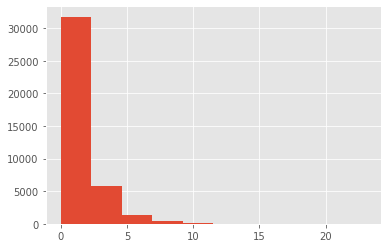

In [114]:
df.propn_count.hist()

In [115]:
df.groupby('sentiment').propn_count.mean().sort_values()

sentiment
boredom       1.201149
worry         1.261249
relief        1.291831
hate          1.295195
sadness       1.296609
anger         1.333333
empty         1.339670
neutral       1.429113
enthusiasm    1.569519
surprise      1.569714
happiness     1.701420
fun           1.778157
love          1.821058
Name: propn_count, dtype: float64

It appears to me that people tend to use proper nouns less often when they express negative sentiment. This might be a feature as well.

#### Polarity with VADER

In [51]:
# Load SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Instantiate new SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def sentiment_analyzer(tweet):
    '''
    Evaluates polarity of a given sentence and returns the result.
    '''
    score = analyzer.polarity_scores(tweet)['compound']
    if score > 0.05:
        polarity = "positive"
    elif score < -0.05:
        polarity = "negative"
    else:
        polarity = "neutral"
    
    return polarity
    
df['polarity_vader'] = df.processed.apply(sentiment_analyzer)

In [54]:
df[['polarity', 'polarity_vader']].head()

,polarity,polarity_vader
0,neutral,negative
1,negative,neutral
2,negative,negative
3,positive,positive
4,neutral,negative


In [55]:
(df.polarity == df.polarity_vader).mean()

0.5432793279327933

In [58]:
df[df.polarity != df.polarity_vader][['processed', 'polarity', 'polarity_vader']].sample(5)

,processed,polarity,polarity_vader
21802,Another water leak in my appartement. The good side is that I get to meet the girls previous next floors,negative,positive
28351,"And i ain't happy go lucky, its just today... The world don't feel ugly",neutral,negative
18678,@user or with any at all boo. suits and grey hair.,neutral,positive
2544,I didn't catch the Jonas Brothers Facebook Webcast... It already ended when I logged in to my Facebook account...,negative,neutral
11126,I really wanted that job,negative,neutral


The results of VADER does not seem to be very accurate, assuming that the emotions are correctly  categorized.